In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [4]:
lines = pd.read_csv('linie-mit-betriebspunkten.xls.csv')

In [8]:
display(lines)

,Abbreviation of the operating point,Name of the operating point,Abkuerzung Betriebspunkt Strecke,Name of operating point distance,LINIE,Kilometry of the operating point,LINIENNAME,VERWALTUNG,E,N,geopos,BPUIC,Didok Nummer,Name Haltestelle,lod
0,AAGB,Aarau GB,AAGB,Aarau GB,650,40.30900,Killwangen West - Lenzburg - Daniken Ost,SBB,2647397.625,1249489.859,"47.394529127, 8.06643793149",8502136,2136,Aarau GB,http://lod.opentransportdata.swiss/didok/8502136
1,AAT,Aathal,AAT,Aathal,740,77.38112,Rapperswil - Uster - Wallisellen Ost,SBB,2700290.162,1243636.271,"47.3359591251, 8.76562510867",8503124,3124,Aathal,http://lod.opentransportdata.swiss/didok/8503124
2,ABE,Aarberg,ABE,Aarberg,251,95.49304,Palezieux Est - Lyss Nord,SBB,2587845.752,1210402.487,"47.0445413042, 7.27869253926",8504404,4404,Aarberg,http://lod.opentransportdata.swiss/didok/8504404
3,ABO,Aarburg-Oftringen,ABO,Aarburg-Oftringen,500,43.00505,Basel SBB - Olten - Luzern,SBB,2635502.466,1241150.149,"47.3202684783, 7.90822265971",8502000,2000,Aarburg-Oftringen,http://lod.opentransportdata.swiss/didok/8502000
4,ABOS,Aarburg-Oftringen Sud (Abzw),ABO,Aarburg-Oftringen,452,0.83337,Rothrist - Zofingen (Kriegsschlaufe),SBB,2636164.469,1240407.291,"47.3135510897, 7.91691900278",8502013,2013,Aarburg-Oftringen Süd (Abzw),http://lod.opentransportdata.swiss/didok/8502013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,ZOER,Zurich Oerlikon,ZOER,Zurich Oerlikon,760,4.72282,Zurich Hardbrucke - Bulach,SBB,2683433.901,1251778.101,"47.4115300323, 8.54413989655",8503006,3006,Zürich Oerlikon,http://lod.opentransportdata.swiss/didok/8503006
1766,ZOLN,Zollikofen Nord (Abzw),ZOL,Zollikofen,450,98.11614,Olten Sud - Bern,SBB,2602072.221,1206293.590,"47.0076913913, 7.46588108097",8515371,15371,Zollikofen Nord (Abzw),http://lod.opentransportdata.swiss/didok/8515371
1767,ZVB,Zurich Vorbahnhof,ZVB,Zurich Vorbahnhof,758,1.98489,ZH Langstrasse - ZH Vorbahnhof (Gl. P24),SBB,2681364.531,1248735.091,"47.384422153, 8.51617021319",8503025,3025,Zürich Vorbahnhof,http://lod.opentransportdata.swiss/didok/8503025
1768,ZVBN,Zurich Vorbahnhof Nord,ZVB,Zurich Vorbahnhof,709,1.71569,Zue Vorbahnhof Nord - Zurich Altstetten,SBB,2681597.890,1248687.642,"47.3839665561, 8.51925165616",8515760,15760,Zürich Vorbahnhof Nord,http://lod.opentransportdata.swiss/didok/8515760


In [12]:
#her OP nin unique ismi var, bunlari kunlarak lines i dogru formata gecirebilirsin.
line_abbrs = np.unique(lines.loc[:,"Abbreviation of the operating point"].to_numpy())

In [9]:
G = nx.Graph()

#dogrudan linesla calismak hatali, cunku lines'da bazi operation pointler birden fazla defa karsimiza cikiyor, her karsimiza cikisinda
#graph'a node eklemek istemiyoruz. Once lines dataframe ini her OP nin bir rowda kayitli oldugu bir formata donusturursen bu comment'in
#altindaki kod sana graph'i yaratir.
for index, row in lines.iterrows():
    G.add_nodes_from([(index, row.to_dict())])
    
line_ids = np.unique(lines.loc[:,"LINIE"].to_numpy())
for line_id in line_ids:
    operation_points = lines[lines["LINIE"] == line_id].sort_values(by='Kilometry of the operating point')
    operation_points = operation_points.index.to_numpy()
    edges = np.concatenate((operation_points[:-1][:,np.newaxis],operation_points[1:][:,np.newaxis]), axis=1)
    G.add_edges_from(edges)

/home/batom/miniconda3/envs/pai/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


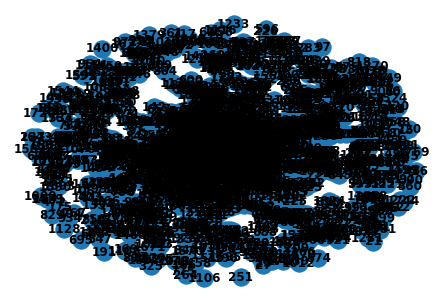

In [10]:
nx.draw(G, with_labels=True, font_weight='bold')

In [59]:
rows = [list(),list()]
for line_abbr in line_abbrs:
    rows[0].append(line_abbr)
    rows[1].append(lines.loc[lines["Abbreviation of the operating point"] == line_abbr]['LINIE'].tolist())


In [60]:
(lines.loc[lines["Abbreviation of the operating point"] == "AAGB"]['LINIE'].tolist())

[650]

In [62]:
for i in range(len(rows[0])):
    rows[1][i].sort()

In [63]:
df = pd.DataFrame(rows)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286
0,AA,AAGB,AAT,ABE,ABO,ABOS,ABOW,AD,AE,AESP,...,ZVBN,ZVBO,ZVBW,ZVIA,ZWD,ZWG,ZWIE,ZWIP,ZWOL,ZZ
1,"[649, 650]",[650],[740],[251],"[451, 500]","[452, 500]","[451, 452]",[850],[230],"[400, 455, 456]",...,"[709, 719, 759]","[714, 759]",[719],"[751, 755, 7744]",[701],[230],"[717, 720]",[751],[720],[701]
